# Aula 4 - Pandas e Seaborn

Nessa aula, iremos tratar dos seguintes conteúdos:
- Combinando DataFrames
- Agrupamentos no Pandas
- Seaborn
- Arquivos de Dados do Seaborn
- Outras Visualizações do Seaborn

In [1]:
import pandas as pd
import numpy as np

## Combinando DataFrames
__Pandas__ fornece um conjunto de métodos para combinar DataFrames, o que é extremamente útil em cenários envolvendo múltiplas fontes de dados. Em particular, os métodos:
- __merge__ combina DataFrames com base nos rótulos das linhas ou valores das colunas
- __concatenate__ combina DataFrames a partir de um eixo específico

### merge
O método __merge__ "funde" dois DataFrames, duas séries, ou uma série com um DataFrame.

A fusão pode ser feita com base nos:
- valores de duas colunas específicas, uma em cada DataFrame 
- valores de uma coluna em um dos DataFrame e rótulos das linhas no outro
- valores dos rótulos das linhas em ambos os DataFrames (ou Séries)

In [2]:
# Construindo dois DataFrames que serão fundidos com o método 'merge'
df1 = pd.DataFrame({'key': ['b','b','a','c','a','a','b'], 
                   'data1': range(7)})

df2 = pd.DataFrame({'key': ['a','b','d','b','d'], 
                   'data2': range(5)})

# Print do primeiro Dataframe


# Print do Segundo Dataframe


In [ ]:
# Usando o merge a partir de uma chave primaria


In [ ]:
# Com o how podemos passar o tipo merge que queremos fazer (left, right, inner, outer)


### concat
O método __concat__ é utilizado para juntar DataFrames ou Séries com base em um dos eixos.
- __axis = 0__ concatena por linhas 
- __axis = 1__ concatena por colunas. Quando empregado em um conjunto de séries resulta em um DataFrame

O método assume como parâmetro uma lista de DataFrames ou Séries.

In [3]:
# Construindo 3 séries especificando os rótulos das linhas
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([1,5, 6], index=['a','f', 'd']) 

# Print das Series


# Contatenando as 3 séries na vertical (axis=0 por default)
# concat recebe uma lista de series ou dataframes


In [ ]:
# Concatenando as 3 séries por colunas especificando o parâmetro 'axis=1'


### pivot
O método __concat__ é utilizado para juntar DataFrames ou Séries com base em um dos eixos.
- __axis = 0__ concatena por linhas 
- __axis = 1__ concatena por colunas. Quando empregado em um conjunto de séries resulta em um DataFrame

O método assume como parâmetro uma lista de DataFrames ou Séries.

In [5]:
df_titanic = pd.read_csv('../Python/titanic.csv')

pd.pivot_table(df_titanic, values='Age', index='Pclass', columns='Sex', aggfunc=np.mean)

Sex,female,male
Pclass,,
1,34.611765,41.281386
2,28.722973,30.740707
3,21.750000,26.507589


In [6]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## GroupBy e Agregadores

Podemos utilizar o __GroupBy__, para fsazer alguns cálculos de agrupamentos específicos (bem parecido com o que fazemos no SQL):

In [ ]:
# Calcula a média de Idade por Sexo
## para agruparmos usamos o metodo group by
## no parentesis passamos uma coluna ou um conjunto de colunas
## Depois precisamos passar entre colchetes o campo que vamos agrupar
## Por fim passamos a metrica que quermos



Pode-se também calcular mais de uma métrica por vez utilizando o __GroupBy__ combinado com o método __agg:__

In [ ]:
# Calculo das Métricas para o Agrupamento Sexo e Idade
# Quero calcular muitas metricas na mesma linha
# podemos usar o .agg e passar uma lista de metricas



In [ ]:
# Com mais de uma categoria dentro do Groupby
# Quero ter mais de uma categoria
# Podemos passar no parentesis uma lista de colunas também



In [ ]:
# Mais de uma categoria e mais de uma métrica calculando
# Podemos calcular para um conjunto de dados diferentes as metricas
# basta passar no indexador (no colchete) uma lista de colunas



## Exercício

1 - Utilize uma função agregada para saber a passagem média e também a soma do dinheiro gasto em passagens por ponto de embarque

2 - Utilize o pivot table para calcular o total de dinheiro gasto em passagens por homens e mulheres de classe

In [12]:
df_titanic.groupby(['Embarked'])['Fare'].agg(["mean", 'sum'])

,mean,sum
Embarked,,
C,59.954144,10072.2962
Q,13.276030,1022.2543
S,27.079812,17439.3988


In [11]:
pd.pivot_table(df_titanic, values='Fare', index='Embarked', columns=(['Sex','Pclass']), aggfunc=np.sum)

Sex          female                             male                      
Pclass            1          2          3          1          2          3
Embarked                                                                  
C         4972.5333   176.8792   337.9833  3928.5417   254.2125   402.1462
Q           90.0000    24.7000   340.1585    90.0000    12.3500   465.0458
S         4753.2917  1468.1500  1642.9668  4183.0458  1865.5500  3526.3945

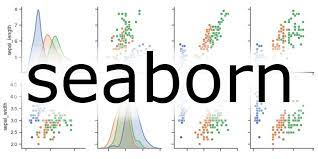

## 

## Seaborn

Quando falamos de visualização de dados, além do __Matplotlib__ uma das principais bibliotecas que temos para utilizar é o __Seaborn__.<br>
<br>
O __Seaborn__ é uma biblioteca baseado no próprio _Matplotlib_, mas focada em gráficos de alta performance, ou seja iremos fazer gráficos de uma maneira __mais simples__ e com uma __riqueza maior nas informações__ que queremos passar com os gráficos.

Para instalar o __Seaborn__ no seu Jupyter Notebooks (quando não tenha já instalado), precisa ser descomentar e rodar o código abaixo:

In [7]:
!pip3 install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)
     |████████████████████████████████| 41.6 MB 2.8 MB/s eta 0:00:01    |▍                               | 501 kB 381 kB/s eta 0:01:48     |█████████████████▉              | 23.2 MB 622 kB/s eta 0:00:30     |███████████████████████████▌    | 35.7 MB 3.4 MB/s eta 0:00:02     |██████████████████████████████▏ | 39.3 MB 3.3 MB/s eta 0:00:01


Primeiro passo será importarmos a bibloteca para o notebook:

In [8]:
# Carregando a Biblioteca
import seaborn as sns

In [16]:
pip install jupyter_contrib_nbextensions

     |████████████████████████████████| 20.9 MB 413 kB/s eta 0:00:01
     |████████████████████████████████| 479 kB 6.6 MB/s eta 0:00:01
     |████████████████████████████████| 861 kB 6.8 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 6.3 MB/s eta 0:00:01
  Created wheel for jupyter-nbextensions-configurator: filename=jupyter_nbextensions_configurator-0.4.1-py2.py3-none-any.whl size=465825 sha256=74088bb6e045b5b5198bf0520eab7846196177e720ad20268ce681616936684c
  Stored in directory: /home/alexsander-vieira/.cache/pip/wheels/e3/3a/b3/a709b437602c3807f079f0c35ccba3e1adf9af6f2e6b0ebfea
  Created wheel for jupyter-latex-envs: filename=jupyter_latex_envs-1.4.6-py2.py3-none-any.whl size=963395 sha256=6468c516a81df23b6c9e615ef96a8b987b4b8d99adb7c078313ba51cb9858f2d
  Stored in directory: /home/alexsander-vieira/.cache/pip/wheels/4d/ba/f4/b8c0941055519ebc0f27e85bfe2bb223f1a59a3b8bfc5c7515
Successfully built jupyter-nbextensions-configurator jupyter-latex-envs
Note: you may nee

In [18]:
jupyter nbextension enable 

SyntaxError: invalid syntax (1065776978.py, line 1)

Além do __Seaborn__, vamos importar algumas outras bibliotecas que serão úteis durante a aula:

In [9]:
# Carregando outras bibliotecas bem úteis
import matplotlib.pyplot as plt

## 

## Arquivos de Datasets do Seaborn

Utilizando a função __load_dataset__, conseguimos carregar alguns datasets bem conhecidos na aprendizagem de Data Science como por exemplo o _Titanic_, _Tips_ entre outros. Podemos consultar todos os datasets disponíveis usando a função __get_dataset_names__:

In [10]:
# usando a função get_dataset_names para saber todos os datasets disponíveis
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

Vamos utilizar o dataset _Iris_ para começar as análises:

In [19]:
# Carrega o dataset Iris
iris = sns.load_dataset('iris')

O _Iris_ é um dataset bem conhecido sobre a classificação de 3 espécies de plantas: _setosa_, _virgínica_ e _versicolor_:<br><br>
<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" width = 800>

Antes de partirmos para análises e novos gráficos de fato, vamos começar a exercitar as boas práticas quando trabalhamos com análise de dados:

In [12]:
# Olhando sobre o DataFrame e seu preenchimento
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
# Print das primeiras linhas do Iris
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [14]:
# Levantando as principais métricas estatísticas para o DataFrame
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Vamos dar uma olhada como está dividido em cada uma das espécies da _Iris_:

In [15]:
# Value counts das categorias
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

##  

## Seaborn x Matplotlib

Primeiramente, vamos recordar como fazer um gráfico de dispersão usando o __Matplotlib__:

In [ ]:
# Ajustando o tamanho da Figura

# Gráfico de Linha

# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Mostra o nosso Gráfico
plt.show()

No __Seaborn__, podemos fazer o mesmo gráfico utilizando a função __scatterplot__: 

In [ ]:
# Ajustando o tamanho da Figura

# Gráfico de Linha

# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Mostra o nosso Gráfico
plt.show()

Mas então, a primeira pergunta é: __quais são as vantagens de usar o Seaborn ao invés do Matplotlib?__<br><br>
Vamos imaginar que queremos fazer o mesmo gráfico mas separando as pelos tipos de _Iris_ (ou seja, separar pelas classes):

In [ ]:
# Separe o DataFrame entre as 3 classes


# Ajustando o tamanho da Figura
plt.figure(figsize = (16,8))

# Gráfico de Linha


# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Colocando a Legenda do Gráfico

# Mostra o nosso Gráfico
plt.show()

No __Seaborn__, sempre que quisermos quebrar um gráfico nas classes basta passar um parâmetro chamado __hue__:

In [ ]:
# Ajustando o tamanho da Figura

# Gráfico de Linha

# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Mostra o nosso Gráfico
plt.show()

E o __Seaborn__ nos permite customizar diversas detalhes do nosso gráfico:

In [ ]:
# Ajustando o tamanho da Figura
plt.figure(figsize = (16,8))

# Gráfico de Linha


# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Mostra o nosso Gráfico
plt.show()

In [ ]:
# Define a semente randômica

# Cria um valor de size no DataFrame

# Ajustando o tamanho da Figura

# Escolhendo um Pallete de Cores

# Passando um parâmetro de Size para o gráfico

# Gráfico de Linha

# Coloca o titulo

# Titulo para eixo X

# Titulo para eixo Y

# Tamanho da fonte da grade X

# Tamanho da fonte da grade Y

# Colocando Grid no Gráfico

# Mostra o nosso Gráfico
plt.show()

Um site bem interessante que vocês podem escolher cores para monta o Palette Cutsomizado é o [Coolors](https://coolors.co/)

In [ ]:
titanic = sns.load_dataset('titanic')

## Exercícios

1 - Utilize o dataset do titanic, junto com a estratégia do scatter plot colorido (exemplos acima), para verificar se a idade em conjunto com a classe de passageiro é um bom classificador para sexo biologico

2 - Utilize a mesma estratégia para verificar se a idade em conjunto com a classe de passageiro é um bom classificador para sobrevivencia

## Outras Visualizações do Seaborn

Vamos passar agora, por algumas das principais visualizações que acabam sendo utilizadas do __Seaborn__:

### PairPlot

In [ ]:
titanic

In [ ]:
# Cria o pairplot

# Mostra o gráfico
plt.show()

##  

### JointPlot

In [ ]:
# Cria o Jointplot

# Mostra o Gráfico
plt.show()

##  

### Distplot e Histplot

In [ ]:
# Cria o distplot

#mostra o Gráfico
plt.show()

In [ ]:
# Cria o displot


#mostra o Gráfico
plt.show()

In [ ]:
# Cria o distplot

#mostra o Gráfico
plt.show()

##  

### FacetGrid

In [ ]:
# Cria o FacetGrid

# Cria o gráfico relacionado

# Mostra o Gráfico
plt.show()

##  

### LMPlot

In [ ]:
# Constroi o LMPlot


# Mostra o Gráfico
plt.show()

In [ ]:
# Constroi o LMPlot


# Mostra o Gráfico
plt.show()

## 

## Exercícios

1 - Verifique se alguma outra combinação de variáveis é um bom classificador para sexo biologico

2 - Gere um histograma das idades do Titanic

Escolha um dataset da lista do começo da aula para os próximos exercícios

3 - Escolha um dataset da lista e utilize o pairplot para analisar o comportamento dos parametros

4 - Explore a documentação do seaborn e gere alguma visualização interessante que valide alguma hipótese do grupo

### HeatMap

O __HeatMap__ (Mapa de Calor) é um gráfico bem interessante quando queremos criar um _Grid_ de variações.<br><br>
Para usar o HeatMap, vamos definir primeiramente as correlações do DataFrame _Iris_:

A função __corr__ mostra como as variáveis do DataFrame estão relacionadas, ou seja o quanto cada variável influência na variação das outras:

In [ ]:
# Cria o HeatMap


# Mostra o Gráfico
plt.show()

## 

### CountPlot e BarPlot

## 

## Desafio

__1)__ Façam a análise exploratória com o que aprendemos até então (NumPy, Pandas, Matplotlib e Seaborn) num dataset do Kaggle.
Levante visualizações que possam ser interessantes e tentem interpretar os dados!

## 

## Links, Artigos e Referências:

- [Documentação do Matplotlib](https://matplotlib.org/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Matplotlib;
- [Documentação do Seaborn](https://seaborn.pydata.org/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Seaborn;
- [Documentação do Plotly](https://plotly.com/python/), documentação onde vocês podem encontrar mais informações sobre os gráficos do Plotly;
- [Beautiful Plots with Python and Seaborn](https://betterprogramming.pub/beautiful-plots-with-python-and-seaborn-9d05c9ead6ed), artigo publicado no blog Better Programming
- [MAtplotlib vs Seaborn vs Plotly](https://towardsdatascience.com/matplotlib-vs-seaborn-vs-plotly-f2b79f5bddb), artigo publicado pela Towards Data Science comparando as 3 bibliotecas;
- ["Como criar gráficos interativos utilizando Plotly e Python"](https://paulovasconcellos.com.br/como-criar-gr%C3%A1ficos-interativos-utilizando-plotly-e-python-3eb6eda57a2b?source=---------62----------------------------), artigo escrito por Paulo Vasconcellos para o Data Hackers.